Solution by Marceli P

1. Complete the activity started in class by training a logistic regression model to identify the type of leukemia. Use the C: [1.0, 10.0, 100.0, 1000.0] parameter grid search and train the model for up to 1000 epochs. Give the accuracy of the obtained model on the test set.

In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

In [7]:
df = pd.read_csv('Leukemia.csv', sep=',')

In [8]:
df.head()

,samples,0 – szpikowa CD34 1 – szpikowa 2 – ostra szpikowa 3 – limfoblastyczna 4 – limfoblastyczna CD34,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,0,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,0,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,0,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,0,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,0,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [9]:
y = df.iloc[:,1] #Ommiting samples
x = df.iloc[:,2:]

In [10]:
normalizer=preprocessing.Normalizer().fit(x)
X=normalizer.transform(x)

In [11]:
print(X.shape, y.shape)

(256, 22283) (256,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
pca=PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

In [14]:
print(pca.explained_variance_ratio_)

[0.33749868 0.098491   0.09660191 0.05695582 0.04610227 0.04254371
 0.02807275 0.0263075  0.01857345 0.01646542]


In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.7676125197129322


In [16]:
pca=PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_[:10])
total_sum=np.cumsum(pca.explained_variance_ratio_)
print(total_sum[:10])

[0.33749868 0.098491   0.09660191 0.05695582 0.04610227 0.04254371
 0.02807275 0.0263075  0.01857348 0.0164655 ]
[0.33749868 0.43598968 0.53259159 0.58954741 0.63564969 0.6781934
 0.70626615 0.73257365 0.75114714 0.76761263]


In [17]:
components=np.argmax(total_sum>=0.9)+1
print(components)

25


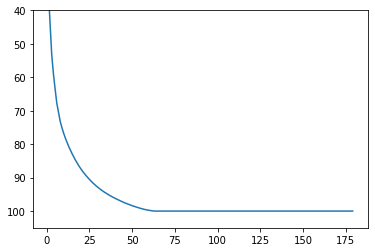

In [18]:
args=np.arange(1,total_sum.size+1)
fig,ax=plt.subplots()
ax.plot(args,total_sum*100)
ax.set_ylim(105,40)
plt.show()

In [19]:
pca=PCA(n_components=components)
pca.fit(X_train)

PCA(n_components=25)

In [20]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [21]:
print(X_train_pca.shape, X_test_pca.shape)

(179, 25) (77, 25)


In [22]:
in_pca=IncrementalPCA(n_components=components,batch_size=100)
X_in_pca=in_pca.fit_transform(X_train)
print(X_in_pca.shape)

(179, 25)


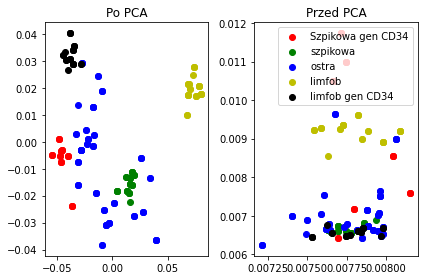

In [23]:
colors=['r','g','b','y','black']
targets=np.arange(0,5,1)

fig, (ax1,ax2)=plt.subplots(1,2)
for color, i, type in zip(colors,targets, y_train):
    ax1.set_title("Po PCA")
    ax1.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,2],color=color,label=type)
    ax2.set_title("Przed PCA")
    ax2.scatter(X_train[y_train==i,0],X_train[y_train==i,2],color=color,label=type)
plt.legend(['Szpikowa gen CD34', 'szpikowa', 'ostra', 'limfob', 'limfob gen CD34'])
plt.tight_layout()
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
logreg = LogisticRegression(max_iter=1000)
grid_all = {"C": [1.0, 10.0, 100.0, 1000.0]}

logreg_cv = GridSearchCV(logreg, grid_all, cv=10)
logreg_cv.fit(X_train_pca,y_train)

print("Tuned hyperparameters :(the best parameters) " , logreg_cv.best_params_)
print("Best score :" , logreg_cv.best_score_)

Tuned hyperparameters :(the best parameters)  {'C': 100.0}
Best score : 1.0


In [26]:
y_test_pred =logreg_cv.predict(X_test_pca)

In [27]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

print("Balanced accuracy score :", balanced_accuracy_score(y_test, y_test_pred))
print ("Average accuracy is: ", accuracy_score(y_test, y_test_pred) * 100, "%")

Balanced accuracy score : 1.0
Average accuracy is:  100.0 %


2. The file 'chronic_kidney_disease.csv' contains medical measurements of 400 patients suspected of chronic renal failure. Using PCA, generate a scree plot for a range of 1 to 13 principal components for the normalized and non-normalized data (use StandardScaler on the training set and then the trained transformation on the test set). Then, determine the number of principal components explaining 90% of the variability of the output model for the normalized data.

Train 2 logistic regression models - one on the complete data, the other on PCA data for 5 components, give their average accuracy on the test set. Train the model for the C parameters grid: [1.0, 10.0, 100.0, 1000.0].

The last column 'Class' contains labels of the final diagnosis (0 - healthy person, 1 - sick person).

In [28]:
df_kidney = pd.read_csv('chronic_kidney_disease.csv', sep=',')

In [29]:
df_kidney.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [30]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [31]:
x = df_kidney.iloc[:,:13]
y = df_kidney.iloc[:,13]
print(x.shape, y.shape)

(400, 13) (400,)


In [32]:
#print(x)
#print(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [34]:
pca=PCA()
pca.fit(X_train)
total_sum_pca=np.cumsum(pca.explained_variance_ratio_)
#print(total_sum_pca)
#type(total_sum_pca)
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)
pca_norm=PCA()
pca_norm.fit(X_train_norm)
total_sum_norm=np.cumsum(pca_norm.explained_variance_ratio_)

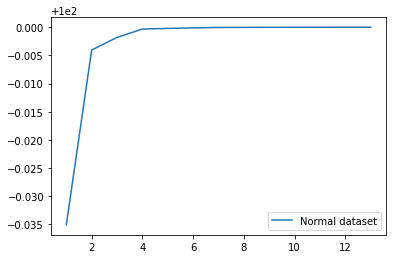

In [35]:
args=np.arange(1,14)
fig,ax=plt.subplots()
ax.plot(args,total_sum_pca[:13]*100, label="Normal dataset")
#ax.set_ylim(105,40)
plt.legend()
plt.show()

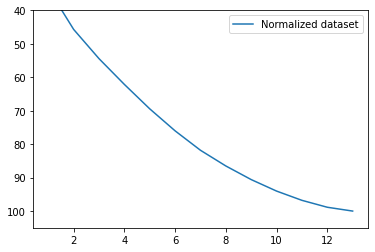

In [36]:
args=np.arange(1,14)
fig,ax=plt.subplots()
ax.plot(args,total_sum_norm[:13]*100, label="Normalized dataset")
ax.set_ylim(105,40)
plt.legend()
plt.show()

In [37]:
components=np.argmax(total_sum_norm>=0.9)+1
print(components)

9


In [38]:
logreg = LogisticRegression(max_iter=1000)
grid = {"C": [1.0, 10.0, 100.0, 1000]}

logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train_norm,y_train)

print("The best parameter " , logreg_cv.best_params_)
print("Best score :" , logreg_cv.best_score_)

y_pred = logreg_cv.predict(X_test_norm)


print("Balanced accuracy score :", balanced_accuracy_score(y_test, y_pred))

print ("Average accuracy is: ", accuracy_score(y_test, y_pred) * 100, "%")

The best parameter  {'C': 10.0}
Best score : 0.9857142857142858
Balanced accuracy score : 0.9603174603174602
Average accuracy is:  96.66666666666667 %


In [39]:
pca_norm=PCA(n_components=5)
pca_norm=pca_norm.fit(X_train_norm)

X_train_norm_pca=pca_norm.transform(X_train_norm)
X_test_norm_pca=pca_norm.transform(X_test_norm)


logreg = LogisticRegression(max_iter=1000)
grid = {"C": [1.0, 10.0, 100.0, 1000]}

logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train_norm_pca,y_train)

print("The best parameter " , logreg_cv.best_params_)
print("Best score :" , logreg_cv.best_score_)

y_pred = logreg_cv.predict(X_test_norm_pca)


print("Balanced accuracy score :", balanced_accuracy_score(y_test, y_pred))

print ("Average accuracy is: ", accuracy_score(y_test, y_pred) * 100, "%")

The best parameter  {'C': 1.0}
Best score : 0.9785714285714286
Balanced accuracy score : 0.9880952380952381
Average accuracy is:  98.33333333333333 %
